In [5]:
require(tidyverse)
require(ggplot2)
require(readr)
require(maps)
require(viridis)

Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:maps':

    unemp




In [6]:
library(tidyverse)
library(ggplot2)
library(readr)
library(maps)
library(viridis)

In [33]:
df <- read_csv('time_series_covid19_clean.csv', show_col_types = FALSE)
print(head(df))

# A tibble: 6 x 5
  Country             Latitude Longitude Confirmed Deaths
  <chr>                  <dbl>     <dbl>     <dbl>  <dbl>
1 Afghanistan             33.9     67.7     155540   7228
2 Albania                 41.2     20.2     175163   2777
3 Algeria                 28.0      1.66    204695   5855
4 Andorra                 42.5      1.52     15307    130
5 Angola                 -11.2     17.9      61580   1629
6 Antigua and Barbuda     17.1    -61.8       3750     93


In [34]:
summary(df)

   Country             Latitude        Longitude         Confirmed      
 Length:4005        Min.   :-52.37   Min.   :-178.12   Min.   :      0  
 Class :character   1st Qu.: 33.21   1st Qu.: -96.59   1st Qu.:   1633  
 Mode  :character   Median : 37.90   Median : -86.76   Median :   4683  
                    Mean   : 35.82   Mean   : -71.33   Mean   :  59494  
                    3rd Qu.: 42.18   3rd Qu.: -77.39   3rd Qu.:  19260  
                    Max.   : 71.71   Max.   : 178.06   Max.   :7475085  
                    NA's   :90       NA's   :90                         
     Deaths      
 Min.   :     0  
 1st Qu.:    26  
 Median :    76  
 Mean   :  1213  
 3rd Qu.:   277  
 Max.   :150789  
                 

info(df)

In [35]:
# check if there are null values
print(is.na(deaths))

        Country_Region Deaths
   [1,]          FALSE  FALSE
   [2,]          FALSE  FALSE
   [3,]          FALSE  FALSE
   [4,]          FALSE  FALSE
   [5,]          FALSE  FALSE
   [6,]          FALSE  FALSE
   [7,]          FALSE  FALSE
   [8,]          FALSE  FALSE
   [9,]          FALSE  FALSE
  [10,]          FALSE  FALSE
  [11,]          FALSE  FALSE
  [12,]          FALSE  FALSE
  [13,]          FALSE  FALSE
  [14,]          FALSE  FALSE
  [15,]          FALSE  FALSE
  [16,]          FALSE  FALSE
  [17,]          FALSE  FALSE
  [18,]          FALSE  FALSE
  [19,]          FALSE  FALSE
  [20,]          FALSE  FALSE
  [21,]          FALSE  FALSE
  [22,]          FALSE  FALSE
  [23,]          FALSE  FALSE
  [24,]          FALSE  FALSE
  [25,]          FALSE  FALSE
  [26,]          FALSE  FALSE
  [27,]          FALSE  FALSE
  [28,]          FALSE  FALSE
  [29,]          FALSE  FALSE
  [30,]          FALSE  FALSE
  [31,]          FALSE  FALSE
  [32,]          FALSE  FALSE
  [33,]   

In [36]:
world <- map_data("world")

In [37]:
# cutoffs based on number of deaths
breaks <- c(1, 20, 100, 1000, 50000)

Warning message:
"Removed 90 rows containing missing values (geom_point)."


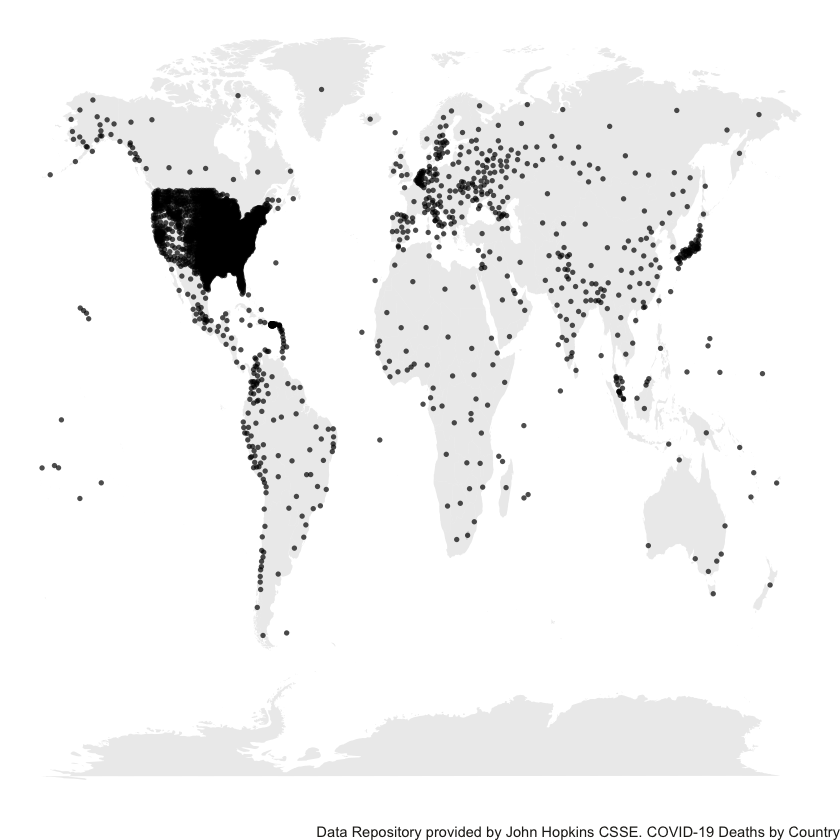

In [53]:
pl <- ggplot() + 
    geom_polygon(data = world, aes(x = long, y = lat, group=group), fill = 'grey', alpha = 0.3) +
    geom_point(data = df, aes(x = Longitude, y = Latitude), stroke = F, alpha = 0.7) +
    scale_size_continuous(name='Deaths', trans='log', range=c(1,7), breaks=breaks, labels=c('1-19', '20-99', '100-999', '1,000-49,999', '50,000+')) +
    scale_color_viridis_c(option='inferno', name='Cases', trans='log', breaks=breaks, labels=c('1-19', '20-99', '100-999', '1,000-49,999', '50,000+')) +
    theme_void() +
    guides( colour = guide_legend()) +
    labs(caption = "Data Repository provided by John Hopkins CSSE. COVID-19 Deaths by Country") +
    theme(
        legend.position = "bottom",
        text = element_text(color='#22211d'),
        plot.background = element_rect(fill='#ffffff', color=NA),
        panel.background = element_rect(fill='#ffffff', color=NA),
        legend.background = element_rect(fill='#ffffff', color=NA),
    )

    print(pl)

In [48]:
is.numeric(df$Deaths)

[1] TRUE